In [277]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge,Lasso, ElasticNet,LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import LocalOutlierFactor
from itertools import combinations

import itertools
import statsmodels.api as sm

In [278]:
df = pd.read_csv("MedicalPremium.csv")

In [279]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [280]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [281]:
df['BMI']=df['Weight']/((df['Height']*0.01)**2)

In [282]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969
...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109


In [283]:
def categorize_bmi(bmi):
    if bmi <= 18.5:
        return 'underweight'
    elif bmi <= 24.9:
        return 'normal'
    elif bmi <= 29.9:
        return 'overweight'
    elif bmi <= 34.9:
        return 'obese'
    else:
        return 'extreme'
    
df['BMI_cat'] = df['BMI'].apply(categorize_bmi)

In [284]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_cat
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,normal
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,normal
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,normal
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,overweight
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562,normal
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029,obese
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549,overweight
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109,overweight


In [285]:
def categorize_age(age):
    if age <= 30:
        return 'Young Adult'
    elif age <= 59:
        return 'Adult'
    else:
        return 'Old'
    
df['Age_cat'] = df['Age'].apply(categorize_age)

In [286]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_cat,Age_cat
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,normal,Adult
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,normal,Old
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,normal,Adult
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,overweight,Adult
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,obese,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562,normal,Young Adult
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029,obese,Old
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549,overweight,Adult
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109,overweight,Adult


In [287]:
#splitting the data to training and testing
cols_to_exclude = ['Height', 'Weight', 'BMI_cat', 'Age_cat','PremiumPrice']
X = df.drop(cols_to_exclude,axis=1)
y = df['PremiumPrice']
scalar =  StandardScaler()
X.Age = scalar.fit_transform(X[['Age']])


In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [302]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [305]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

k = 11
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X_train.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X_train.columns,k):
        tmp_result = fit_linear_reg(X_train[list(combo)],y_train)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

C:\Users\CC\AppData\Local\Temp\ipykernel_13992\2198998926.py:9: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X_train.columns) + 1, desc = 'Loop...'):


Loop...:   0%|          | 0/9 [00:00<?, ?it/s]

In [306]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(3))
display(df_max.head(3))

,numb_features,RSS,R_squared,features
0,1,1.251037e+10,0.534847,"(Age,)"
11,2,1.112551e+10,0.586338,"(Age, AnyTransplants)"
58,3,1.044401e+10,0.611677,"(Age, AnyTransplants, AnyChronicDiseases)"


,numb_features,RSS,R_squared,features
0,1,1.251037e+10,0.534847,"(Age,)"
11,2,1.112551e+10,0.586338,"(Age, AnyTransplants)"
58,3,1.044401e+10,0.611677,"(Age, AnyTransplants, AnyChronicDiseases)"


In [307]:
# lof = LocalOutlierFactor()
# yhat = lof.fit_predict(X_train)
# # select all rows that are not outliers
# mask = yhat != -1
# X_train, y_train = X_train[mask, :], y_train[mask]

In [308]:
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("Mask shape:", mask.shape)


In [309]:
# print(mask.dtype)

In [218]:
# mask = mask.reshape(-1)  # Reshape to a 1-dimensional array


In [237]:
Linear_Regression=LinearRegression()
Lasso=Lasso(alpha=4)
Ridge=Ridge(alpha=0)
XGBoost=XGBRegressor()
RandomForest=RandomForestRegressor()
ElasticNet=ElasticNet(alpha=0.1, l1_ratio=0.5)

In [238]:
def predictor(model_name):
    print("For the {}".format(model_name))
    model_name.fit(X_train,y_train)
    y_pred_train = model_name.predict(X_train)
    y_pred_test = model_name.predict(X_test)
    print("The TRAIN r2 score is",r2_score(y_train,y_pred_train))
    print("The RMSE score for TRAIN data is",np.sqrt(mean_squared_error(y_train,y_pred_train)))

    print("The TEST r2 score is",r2_score(y_test,y_pred_test))
    print("The RMSE score for TEST data is",np.sqrt(mean_squared_error(y_test,y_pred_test)))

In [181]:
predictor(Linear_Regression)

For the LinearRegression()
The TRAIN r2 score is 0.6389485831347267
The RMSE score for TRAIN data is 3751.4333082517423
The TEST r2 score is 0.6048213832354187
The RMSE score for TEST data is 3908.7739623240655


In [182]:
predictor(Lasso)

For the Lasso(alpha=4)
The TRAIN r2 score is 0.6389250690859385
The RMSE score for TRAIN data is 3751.5554652985443
The TEST r2 score is 0.6036632645111952
The RMSE score for TEST data is 3914.4973395161437


In [197]:
predictor(RandomForest)

For the RandomForestRegressor()
The TRAIN r2 score is 0.9677002416143056
The RMSE score for TRAIN data is 1122.050336001794
The TEST r2 score is 0.679163754532927
The RMSE score for TEST data is 3521.9691781575675


In [166]:
predictor(Ridge)

For the Ridge(alpha=0)
The TRAIN r2 score is 0.6389485831347267
The RMSE score for TRAIN data is 3751.4333082517423
The TEST r2 score is 0.604821383235412
The RMSE score for TEST data is 3908.7739623240986


In [198]:
predictor(XGBoost)

For the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
The TRAIN r2 score is 0.9989870682568948
The RMSE score for TRAIN data is 198.70225413541328
The TEST r2 score is 0.6737394491680562
The RMSE score for TEST data is 3551.6169568867426


In [196]:
k_folds = 5

# Perform cross-validation
cv_scores = cross_val_score(Linear_Regression, X, y, cv=k_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.6170803  0.65092347 0.6329237  0.73807759 0.48880842]
Mean CV Score: 0.6255626958404491


In [100]:
#numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [101]:
#numeric_features = ['Age','BMI']

In [102]:
#preprocessor = ColumnTransformer( transformers=[('numeric', numeric_transformer, numeric_features) , ('categorical', categorical_transformer, categorical_features)])

In [103]:
# models = {
#     LinearRegression():'Linear Regression',
#     Lasso():'Lasso',
#     Ridge():'Ridge',
#     XGBRegressor():'XGBoost',
#     RandomForestRegressor():'RandomForest',
#     ElasticNet():'ElasticNet'
# }
# for model, name in models.items():
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
#     pipeline.fit(X_train, y_train)
#     y_pred = pipeline.predict(X_test)
#     r2=r2_score(y_test, y_pred)
#     print (f"{name}:{r2} ")

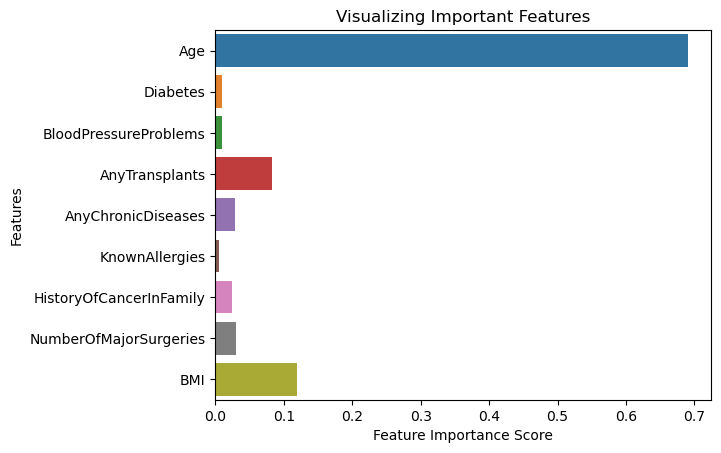

In [98]:


random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)


feature_imp1 = random_forest.feature_importances_


sns.barplot(x=feature_imp1, y=X.columns)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


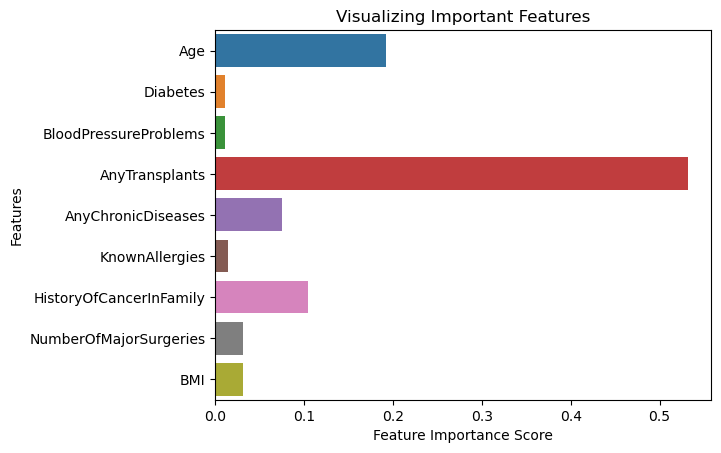

In [99]:
xgBoost = XGBRegressor()


xgBoost.fit(X_train, y_train)

feature_imp1 = xgBoost.feature_importances_


sns.barplot(x=feature_imp1, y=X.columns)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


# Clustering